In [1]:
!pip install tensorflow==2.4.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=76bfd7450ae717397abbb68f676f24a3b7eae4af7e0584d3baa50724038e3eed
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=38400 sha256=7a4d2f466195a01978440939e2de974b4cc5c3757f9d969b5687eee1496fe243
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extens

You should consider upgrading via the 'c:\users\kaitl\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

from custom.iris_lm_depth import from_landmarks_to_depth
from videosource import FileSource, WebcamSource

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('mar6_50_50') 

# Actions that we try to detect
actions = np.array(['yes', 'neutral','no' ])

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 50



In [3]:


mp_face_mesh = mp.solutions.face_mesh

left_eye_landmarks_id = np.array([33, 133])
right_eye_landmarks_id = np.array([362, 263])

dist_coeff = np.zeros((4, 1))

YELLOW = (0, 255, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)
RED = (0, 0, 255)
SMALL_CIRCLE_SIZE = 1
LARGE_CIRCLE_SIZE = 2


LEFT_EYE_LANDMARKS_ID = np.array([33, 133])
RIGHT_EYE_LANDMARKS_ID = np.array([362, 263])

POINTS_IDX = [33, 133, 362, 263]
POINTS_IDX = list(set(POINTS_IDX))
POINTS_IDX.sort()


In [4]:

def __add_landmark_to_df(landmark, landmark_idx, df_headers, df_values):
    """Helper function that adds a landmark to the dataframe"""

    df_headers.append("x{}".format(landmark_idx))
    df_headers.append("y{}".format(landmark_idx))
    df_headers.append("z{}".format(landmark_idx))

    df_values.append(landmark[0])
    df_values.append(landmark[1])
    df_values.append(landmark[2])


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
label_map = {label:num for num, label in enumerate(actions)}


In [7]:
label_map

{'yes': 0, 'neutral': 1, 'no': 2}

In [8]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [9]:
import math
def compareMidPointToLandMarks(midpoint, anchors):
    distances = []
    x = 0
    y = 1
    distances.append(math.sqrt((anchors[0+x]-midpoint[0+x])**2 + (anchors[0+y]-midpoint[0+y])**2))
    distances.append(math.sqrt((anchors[3+x]- midpoint[0+x])**2 + (anchors[3+y]-midpoint[0+y])**2))
    return distances

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(2, sequence_length) :
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            
            
            ### This is the New landmark points for only the bottom lid
            f1 = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
#             f1 = compareMidPointToLandMarks(res[0:3], res[132:])
            window.append(f1)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape


(150, 48, 330)

In [13]:
np.array(labels).shape


(150,)

In [14]:
X = np.array(sequences)
X.shape


(150, 48, 330)

In [15]:
y = to_categorical(labels).astype(int)


In [16]:
y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [18]:
y_test.shape

(8, 3)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(48, 330)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [22]:
res = [.7, 0.2, 0.1]


In [23]:
actions[np.argmax(res)]


'yes'

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [25]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
5/5 [==============================] - 3s 154ms/step - loss: 1.0959 - categorical_accuracy: 0.4324
Epoch 2/2000
5/5 [==============================] - 0s 46ms/step - loss: 1.0696 - categorical_accuracy: 0.6592
Epoch 3/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.9452 - categorical_accuracy: 0.6775
Epoch 4/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.5812 - categorical_accuracy: 0.6180
Epoch 5/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.6070 - categorical_accuracy: 0.6389
Epoch 6/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.5459 - categorical_accuracy: 0.6540
Epoch 7/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.5187 - categorical_accuracy: 0.7252
Epoch 8/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.5127 - categorical_accuracy: 0.6635
Epoch 9/2000
5/5 [==============================] - 0s 49ms/step - loss: 0.5014 - categorical_accuracy: 0.6674


5/5 [==============================] - 0s 43ms/step - loss: 0.2135 - categorical_accuracy: 0.8842
Epoch 147/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1821 - categorical_accuracy: 0.9085
Epoch 148/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1514 - categorical_accuracy: 0.9207
Epoch 149/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.1537 - categorical_accuracy: 0.9243
Epoch 150/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1592 - categorical_accuracy: 0.9158
Epoch 151/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.1760 - categorical_accuracy: 0.8996
Epoch 152/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.1635 - categorical_accuracy: 0.9100
Epoch 153/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.1762 - categorical_accuracy: 0.9043
Epoch 154/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.1507 - categorical_accuracy: 0.924

5/5 [==============================] - 0s 42ms/step - loss: 6.1280e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
5/5 [==============================] - 0s 43ms/step - loss: 7.2084e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
5/5 [==============================] - 0s 43ms/step - loss: 6.3283e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
5/5 [==============================] - 0s 43ms/step - loss: 4.9840e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
5/5 [==============================] - 0s 43ms/step - loss: 4.8038e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
5/5 [==============================] - 0s 44ms/step - loss: 5.0397e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
5/5 [==============================] - 0s 47ms/step - loss: 4.7605e-04 - categorical_accuracy: 1.0000
Epoch 297/2000
5/5 [==============================] - 0s 45ms/step - loss: 4.6271e-04 - categorical_accuracy: 1.0000
Epoch 298/2000
5/5 [==============================] - 0s 46ms/step - loss: 5.29

5/5 [==============================] - 0s 45ms/step - loss: 4.3875e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
5/5 [==============================] - 0s 44ms/step - loss: 4.3077e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
5/5 [==============================] - 0s 44ms/step - loss: 4.5342e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
5/5 [==============================] - 0s 44ms/step - loss: 3.9647e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
5/5 [==============================] - 0s 45ms/step - loss: 4.0501e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
5/5 [==============================] - 0s 46ms/step - loss: 4.4217e-05 - categorical_accuracy: 1.0000
Epoch 436/2000
5/5 [==============================] - 0s 45ms/step - loss: 4.5050e-05 - categorical_accuracy: 1.0000
Epoch 437/2000
5/5 [==============================] - 0s 45ms/step - loss: 3.8566e-05 - categorical_accuracy: 1.0000
Epoch 438/2000
5/5 [==============================] - 0s 45ms/step - loss: 3.92

5/5 [==============================] - 0s 44ms/step - loss: 1.0964e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
5/5 [==============================] - 0s 43ms/step - loss: 1.1221e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.3270e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.2233e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
5/5 [==============================] - 0s 44ms/step - loss: 8.4441e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.0862e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.0059e-05 - categorical_accuracy: 1.0000
Epoch 577/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.3672e-05 - categorical_accuracy: 1.0000
Epoch 578/2000
5/5 [==============================] - 0s 44ms/step - loss: 9.55

5/5 [==============================] - 0s 44ms/step - loss: 3.8188e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
5/5 [==============================] - 0s 44ms/step - loss: 3.4931e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
5/5 [==============================] - 0s 43ms/step - loss: 3.7718e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
5/5 [==============================] - 0s 43ms/step - loss: 3.3269e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
5/5 [==============================] - 0s 43ms/step - loss: 3.4876e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
5/5 [==============================] - 0s 43ms/step - loss: 3.7794e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
5/5 [==============================] - 0s 44ms/step - loss: 4.0155e-06 - categorical_accuracy: 1.0000
Epoch 717/2000
5/5 [==============================] - 0s 43ms/step - loss: 3.0298e-06 - categorical_accuracy: 1.0000
Epoch 718/2000
5/5 [==============================] - 0s 44ms/step - loss: 3.45

5/5 [==============================] - 0s 46ms/step - loss: 1.1952e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.6233e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.5252e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
5/5 [==============================] - 0s 46ms/step - loss: 1.0459e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
5/5 [==============================] - 0s 46ms/step - loss: 1.4171e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.1964e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.4191e-06 - categorical_accuracy: 1.0000
Epoch 857/2000
5/5 [==============================] - 0s 47ms/step - loss: 1.3356e-06 - categorical_accuracy: 1.0000
Epoch 858/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.00

5/5 [==============================] - 0s 45ms/step - loss: 4.6432e-07 - categorical_accuracy: 1.0000
Epoch 991/2000
5/5 [==============================] - 0s 44ms/step - loss: 4.3023e-07 - categorical_accuracy: 1.0000
Epoch 992/2000
5/5 [==============================] - 0s 45ms/step - loss: 5.1282e-07 - categorical_accuracy: 1.0000
Epoch 993/2000
5/5 [==============================] - 0s 44ms/step - loss: 5.3791e-07 - categorical_accuracy: 1.0000
Epoch 994/2000
5/5 [==============================] - 0s 47ms/step - loss: 3.4498e-07 - categorical_accuracy: 1.0000
Epoch 995/2000
5/5 [==============================] - 0s 44ms/step - loss: 5.4293e-07 - categorical_accuracy: 1.0000
Epoch 996/2000
5/5 [==============================] - 0s 46ms/step - loss: 3.6842e-07 - categorical_accuracy: 1.0000
Epoch 997/2000
5/5 [==============================] - 0s 44ms/step - loss: 4.0982e-07 - categorical_accuracy: 1.0000
Epoch 998/2000
5/5 [==============================] - 0s 44ms/step - loss: 5.11

5/5 [==============================] - 0s 44ms/step - loss: 0.1487 - categorical_accuracy: 0.9778
Epoch 1132/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.1376 - categorical_accuracy: 0.9868
Epoch 1133/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.1821 - categorical_accuracy: 0.9832
Epoch 1134/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1659 - categorical_accuracy: 0.9672
Epoch 1135/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.1461 - categorical_accuracy: 0.9946
Epoch 1136/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.1757 - categorical_accuracy: 0.9700
Epoch 1137/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1346 - categorical_accuracy: 0.9940
Epoch 1138/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1636 - categorical_accuracy: 0.9696
Epoch 1139/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.1247 - categorical_accurac

5/5 [==============================] - 0s 44ms/step - loss: 0.1015 - categorical_accuracy: 0.9832
Epoch 1204/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.1022 - categorical_accuracy: 0.9856
Epoch 1205/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.1009 - categorical_accuracy: 0.9920
Epoch 1206/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0944 - categorical_accuracy: 0.9946
Epoch 1207/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0783 - categorical_accuracy: 0.9868
Epoch 1208/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0628 - categorical_accuracy: 0.9946
Epoch 1209/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0623 - categorical_accuracy: 1.0000
Epoch 1210/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0594 - categorical_accuracy: 1.0000
Epoch 1211/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0485 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0335 - categorical_accuracy: 1.0000
Epoch 1276/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0346 - categorical_accuracy: 1.0000
Epoch 1277/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0295 - categorical_accuracy: 1.0000
Epoch 1278/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0333 - categorical_accuracy: 1.0000
Epoch 1279/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0316 - categorical_accuracy: 1.0000
Epoch 1280/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0366 - categorical_accuracy: 1.0000
Epoch 1281/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0349 - categorical_accuracy: 1.0000
Epoch 1282/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0341 - categorical_accuracy: 1.0000
Epoch 1283/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0291 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0236 - categorical_accuracy: 1.0000
Epoch 1348/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0196 - categorical_accuracy: 1.0000
Epoch 1349/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0204 - categorical_accuracy: 1.0000
Epoch 1350/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0212 - categorical_accuracy: 1.0000
Epoch 1351/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0206 - categorical_accuracy: 1.0000
Epoch 1352/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0208 - categorical_accuracy: 1.0000
Epoch 1353/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0214 - categorical_accuracy: 1.0000
Epoch 1354/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0206 - categorical_accuracy: 1.0000
Epoch 1355/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0213 - categorical_accurac

5/5 [==============================] - 0s 44ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 1420/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0143 - categorical_accuracy: 1.0000
Epoch 1421/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 1422/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 1423/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0137 - categorical_accuracy: 1.0000
Epoch 1424/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 1425/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 1426/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0142 - categorical_accuracy: 1.0000
Epoch 1427/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0146 - categorical_accurac

5/5 [==============================] - 0s 48ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 1492/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 1493/2000
5/5 [==============================] - 0s 49ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 1494/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 1495/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0108 - categorical_accuracy: 1.0000
Epoch 1496/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 1497/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 1498/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 1499/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0102 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0081 - categorical_accuracy: 1.0000
Epoch 1564/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 1565/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 1566/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 1567/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 1568/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 1569/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 1570/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 1571/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0072 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 1636/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 1637/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1638/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 1639/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 1640/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 1641/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 1642/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 1643/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0059 - categorical_accurac

5/5 [==============================] - 0s 44ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 1708/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 1709/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 1710/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0049 - categorical_accuracy: 1.0000
Epoch 1711/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 1712/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 1713/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0041 - categorical_accuracy: 1.0000
Epoch 1714/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1715/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0045 - categorical_accurac

5/5 [==============================] - 0s 44ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 1780/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1781/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 1782/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 1783/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1784/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 1785/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1786/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1787/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0036 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 1852/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1853/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1854/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1855/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1856/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 1857/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1858/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1859/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0028 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1924/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1925/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1926/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 1927/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 1928/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 1929/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1930/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1931/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0023 - categorical_accurac

5/5 [==============================] - 0s 43ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1996/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1997/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1998/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1999/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 2000/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0016 - categorical_accuracy: 1.0000


In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 48, 64)            101120    
_________________________________________________________________
lstm_1 (LSTM)                (None, 48, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 255,683
Trainable params: 255,683
Non-trainable params: 0
__________________________________________________

In [27]:
res = model.predict(X_test)

In [28]:
actions[np.argmax(res[0])]


'neutral'

In [29]:
actions[np.argmax(y_test[0])]


'neutral'

In [31]:
model.save('IRIS48_landmark_delta_yes_neutral_no_1.h5')


In [32]:
del model


In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(48, 330)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


model.load_weights('IRIS48_landmark_delta_yes_neutral_no_1.h5')

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools


In [36]:
yhat = model.predict(X_test)
yhat

array([[3.5234855e-08, 1.0000000e+00, 1.0067503e-18],
       [1.0000000e+00, 6.5403769e-22, 0.0000000e+00],
       [4.1401689e-03, 1.5884031e-03, 9.9427140e-01],
       [1.0000000e+00, 1.6773217e-08, 2.0824740e-19],
       [3.9392370e-03, 1.3674222e-03, 9.9469334e-01],
       [4.0735388e-03, 1.2918548e-03, 9.9463463e-01],
       [1.0000000e+00, 5.9274098e-14, 2.4720665e-33],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4 0 0]
 [0 1 0]
 [0 0 3]]


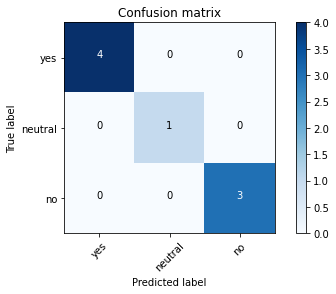

In [38]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

cnf_matrix = confusion_matrix(ytrue, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes','neutral', 'no'],normalize= False,  title='Confusion matrix')

In [39]:
accuracy_score(ytrue, yhat)


1.0

In [40]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [43]:
sequence = []
sentence = []
threshold = 0.9
print(type(sequence))


def main2(sequence, sentence, seqLen):
    FIRST_TIME = True
    frame_height, frame_width = (720, 1280)
    source = WebcamSource(width=frame_width, height=frame_height)
    image_size = (frame_width, frame_height)
    count = 0

    # pseudo camera internals
    focal_length = frame_width

    landmarks = None
    smooth_left_depth = -1
    smooth_right_depth = -1
    smooth_factor = 0.1

    with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5,
    ) as face_mesh:
        for idx, (frame, frame_rgb) in enumerate(source):
            results = face_mesh.process(frame_rgb)
            multi_face_landmarks = results.multi_face_landmarks

            if multi_face_landmarks:
                face_landmarks = results.multi_face_landmarks[0]
                landmarks = np.array(
                    [(lm.x, lm.y, lm.z)
                     for lm in face_landmarks.landmark]
                )
                landmarks = landmarks.T

                (
                    left_depth,
                    left_iris_size,
                    left_iris_landmarks,
                    left_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, left_eye_landmarks_id],
                    image_size,
                    is_right_eye=False,
                    focal_length=focal_length,
                )

                (
                    right_depth,
                    right_iris_size,
                    right_iris_landmarks,
                    right_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, right_eye_landmarks_id],
                    image_size,
                    is_right_eye=True,
                    focal_length=focal_length,
                )
                

                if smooth_right_depth < 0:
                    smooth_right_depth = right_depth
                else:
                    smooth_right_depth = (
                        smooth_right_depth * (1 - smooth_factor)
                        + right_depth * smooth_factor
                    )

                if smooth_left_depth < 0:
                    smooth_left_depth = left_depth
                else:
                    smooth_left_depth = (
                        smooth_left_depth * (1 - smooth_factor)
                        + left_depth * smooth_factor
                    )

            if landmarks is not None:

                landmark_idx = 0
                df_headers = []
                df_values = []

                # add eye contours to dataframe
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours[0:17],
                        left_eye_contours[0:17],
                    ]
                )

                # add iris landmarks to dataframe
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks,
                        left_iris_landmarks,
                    ]
                )
                for landmark in iris_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                for landmark in eye_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                # add subset of facemesh to dataframe
                for ii in POINTS_IDX:

                    landmark = (landmarks[0, ii],
                                landmarks[1, ii], landmarks[2, ii])
                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                 # Export to CSV
#                         with open(outputfilepath, mode='a', newline='') as f:
#                             csv_writer = csv.writer(
#                                 f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                             if (FIRST_TIME):
#                                 csv_writer.writerow(df_headers)
#                                 FIRST_TIME = False
#                             csv_writer.writerow(df_values)

                # draw subset of facemesh
                for ii in POINTS_IDX:
                    pos = (np.array(image_size) *
                           landmarks[:2, ii]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), LARGE_CIRCLE_SIZE, GREEN, -1)

                # draw eye contours
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours,
                        left_eye_contours,
                    ]
                )
                for landmark in eye_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, RED, -1)

                # draw iris landmarks
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks[0:3],
                        left_iris_landmarks[0:5],
                    ]
                )
                for landmark in iris_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, YELLOW, -1)

                # write depth values into frame
                depth_string = "{:.2f}cm, {:.2f}cm".format(
                    smooth_left_depth / 10, smooth_right_depth / 10
                )
                frame = cv2.putText(
                    frame,
                    depth_string,
                    (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,
                    GREEN,
                    2,
                    cv2.LINE_AA,
                )
                
                res = np.array(df_values)
                keypoints = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
                ##THESE ARE OLD VERSIONS
#                 keypoints = compareIrisLandmarks(keyLandmarks[15:30], keyLandmarks[81:132], keyLandmarks[132:138]) + compareIrisLandmarks(keyLandmarks[0:15], keyLandmarks[30:81], keyLandmarks[138:])
#                 keypoints = compareMidPointToLandMarks(df_values[0:3], df_values[132:])
                sequence.append(keypoints)
                sequence = sequence[-seqLen:]
                if len(sequence) == seqLen:
                    
                    print(res)

                    #3. Viz logic
                    if res[np.argmax(res)] > threshold: 
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                    # Viz probabilities
                    frame = prob_viz(res, actions, frame, colors)
                    source.show(frame)


<class 'list'>


In [44]:
s= []
s1 = []
main2(s, s1, 48)

[1.00e+00 3.62e-06 1.02e-21]
[1.00e+00 9.89e-06 2.34e-23]
[1.00e+00 5.36e-06 2.35e-24]
[1.00e+00 2.13e-05 8.07e-25]
[1.00e+00 4.98e-06 5.37e-26]
[1.00e+00 2.58e-05 2.92e-26]
[1.00e+00 1.97e-05 7.60e-27]
[1.00e+00 3.05e-04 6.89e-26]
[1.0e+00 6.4e-05 8.6e-28]
[9.92e-01 8.02e-03 2.80e-25]
[3.87e-01 6.13e-01 8.49e-23]
[1.12e-02 9.89e-01 1.08e-21]
[1.68e-03 9.98e-01 6.32e-21]
[2.20e-04 1.00e+00 1.18e-19]
[8.83e-05 1.00e+00 2.03e-18]
[4.57e-05 1.00e+00 2.46e-17]
[3.26e-05 1.00e+00 2.76e-16]
[2.43e-05 1.00e+00 2.50e-16]
[2.61e-05 1.00e+00 5.32e-18]
[1.99e-04 1.00e+00 1.26e-22]
[2.65e-02 9.73e-01 1.44e-25]
[4.77e-01 5.23e-01 2.67e-27]
[9.79e-01 2.07e-02 7.08e-30]
[1.00e+00 4.33e-04 3.32e-33]
[1.00e+00 1.74e-05 3.67e-35]
[1.00e+00 4.50e-07 1.51e-36]
[1.00e+00 8.54e-08 4.75e-37]
[1.00e+00 1.18e-08 1.63e-37]
[1.00e+00 3.17e-10 7.77e-38]
[1.00e+00 1.81e-11 1.65e-37]
[1.00e+00 7.99e-12 3.00e-36]
[1.00e+00 1.85e-11 2.01e-33]
[1.00e+00 1.65e-09 4.34e-27]
[1.00e+00 2.43e-05 7.74e-18]
[0.69 0.   0.31]


[9.92e-01 7.90e-03 2.47e-20]
[1.00e+00 6.81e-06 2.81e-24]
[1.00e+00 3.65e-09 4.28e-27]
[1.00e+00 1.56e-11 1.78e-27]
[1.00e+00 2.43e-13 1.62e-26]
[1.00e+00 1.43e-14 3.61e-27]
[1.00e+00 3.27e-15 9.85e-27]
[1.0e+00 2.7e-16 6.0e-29]
[1.00e+00 4.15e-18 1.38e-34]
[1.00e+00 1.96e-20 0.00e+00]
[1.00e+00 1.31e-24 0.00e+00]
[0.97 0.02 0.01]
[9.17e-01 8.29e-02 2.35e-05]
[7.76e-01 2.24e-01 2.53e-08]
[6.66e-01 3.34e-01 4.12e-10]
[5.67e-01 4.33e-01 2.75e-12]
[5.44e-01 4.56e-01 2.73e-13]
[4.85e-01 5.15e-01 8.50e-16]
[5.58e-01 4.42e-01 6.91e-15]
[6.77e-01 3.23e-01 1.15e-12]
[8.34e-01 1.66e-01 1.04e-08]
[0.95 0.04 0.02]
[0.1  0.01 0.89]
[0.01 0.   0.99]
[0.01 0.   0.99]
[0.01 0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99]
[0.   0.   0.99

[1.37e-02 8.31e-04 9.85e-01]
[2.63e-02 7.56e-04 9.73e-01]
[8.09e-02 7.79e-04 9.18e-01]
[3.17e-01 6.78e-04 6.82e-01]
[8.38e-01 1.91e-04 1.62e-01]
[9.94e-01 1.46e-05 5.94e-03]
[1.00e+00 8.60e-07 4.91e-05]
[1.00e+00 4.65e-08 4.34e-08]
[1.00e+00 7.02e-09 8.02e-11]
[1.00e+00 3.31e-09 4.50e-13]
[1.00e+00 1.61e-09 2.91e-15]
[1.00e+00 1.19e-09 7.22e-17]
[1.00e+00 6.17e-10 9.44e-19]
[1.00e+00 2.65e-10 5.54e-20]
[1.00e+00 6.96e-11 1.43e-21]
[1.00e+00 1.09e-11 1.43e-23]
[1.00e+00 3.74e-12 7.71e-25]
[1.00e+00 1.66e-12 4.50e-26]
[1.00e+00 4.81e-13 7.91e-28]
[1.00e+00 2.76e-13 1.30e-28]
[1.00e+00 2.99e-13 8.32e-29]
[1.00e+00 4.87e-13 1.58e-28]
[1.00e+00 1.59e-12 1.20e-27]
[1.00e+00 4.74e-12 1.03e-26]
[1.00e+00 2.74e-11 5.67e-25]
[1.00e+00 6.10e-10 2.95e-22]
[1.00e+00 1.29e-08 1.05e-18]
[1.00e+00 6.55e-08 3.32e-14]
[1.00e+00 1.15e-07 1.32e-13]
[1.00e+00 1.95e-07 1.10e-14]
[1.00e+00 2.45e-07 3.79e-16]
[1.00e+00 1.57e-07 8.04e-18]
[1.00e+00 7.67e-08 2.51e-19]
[1.00e+00 3.46e-08 1.35e-20]
[1.00e+00 1.04

[1.00e+00 2.18e-04 1.20e-27]
[1.00e+00 2.18e-04 1.99e-27]
[1.00e+00 2.37e-04 3.04e-27]
[1.00e+00 3.73e-04 6.97e-27]
[9.99e-01 1.18e-03 4.14e-26]
[9.97e-01 2.60e-03 1.92e-25]
[9.97e-01 2.78e-03 8.37e-26]
[9.96e-01 3.92e-03 1.54e-25]
[9.95e-01 5.45e-03 2.11e-25]
[9.93e-01 7.15e-03 1.66e-25]
[9.91e-01 8.89e-03 2.58e-25]
[9.90e-01 9.99e-03 4.99e-25]
[9.90e-01 1.03e-02 7.03e-25]
[9.86e-01 1.35e-02 4.83e-25]
[9.88e-01 1.23e-02 3.81e-25]
[9.94e-01 5.52e-03 1.69e-25]
[9.93e-01 7.07e-03 1.14e-25]
[9.95e-01 5.25e-03 1.54e-25]
[9.95e-01 4.73e-03 2.80e-25]
[9.98e-01 2.15e-03 7.57e-26]
[9.97e-01 2.59e-03 6.52e-26]
[9.95e-01 4.84e-03 1.08e-25]
[9.96e-01 4.17e-03 2.50e-25]
[9.92e-01 7.70e-03 1.36e-24]
[9.95e-01 5.32e-03 8.68e-24]
[9.96e-01 4.42e-03 3.95e-23]
[9.96e-01 4.12e-03 1.96e-22]
[9.93e-01 7.34e-03 1.58e-21]
[9.94e-01 5.93e-03 3.38e-21]
[9.92e-01 7.89e-03 9.49e-21]
[9.97e-01 3.42e-03 3.20e-21]
[9.98e-01 1.70e-03 7.18e-22]
[1.00e+00 3.34e-04 3.76e-23]
[1.00e+00 1.12e-04 3.64e-24]
[1.00e+00 4.15

[2.53e-04 1.00e+00 5.95e-13]
[8.23e-04 9.99e-01 4.53e-12]
[4.61e-04 1.00e+00 2.86e-12]
[2.46e-04 1.00e+00 1.43e-12]
[1.18e-04 1.00e+00 5.51e-13]
[7.96e-05 1.00e+00 2.86e-13]
[3.41e-05 1.00e+00 9.50e-14]
[1.80e-05 1.00e+00 3.06e-14]
[4.21e-06 1.00e+00 5.00e-15]
[4.39e-07 1.00e+00 9.80e-17]
[1.08e-07 1.00e+00 6.74e-22]
[5.09e-03 9.95e-01 6.36e-32]
[0.87 0.13 0.  ]
[1.00e+00 8.12e-07 0.00e+00]
[1.0e+00 1.1e-11 0.0e+00]
[1.00e+00 8.32e-14 0.00e+00]
[1.0e+00 3.2e-19 0.0e+00]
[1.00e+00 4.14e-34 0.00e+00]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1.00e+00 4.04e-32 0.00e+00]
[1.0e+00 3.2e-21 0.0e+00]
[1.00e+00 2.01e-21 0.00e+00]
[1.00e+00 6.36e-22 0.00e+00]
[1.00e+00 2.92e-22 0.00e+00]
[1.00e+00 7.62e-22 0.00e+00]
[1.0e+00 6.1e-21 0.0e+00]
[1.00e+00 2.4

In [47]:
s= []
s1 = []
main2(s, s1)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
no
yes
yes
no
yes
yes
yes
yes
yes
no
yes
yes
no
yes
yes
yes
no
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
